<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Стандратизация-признаков" data-toc-modified-id="Стандратизация-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стандратизация признаков</a></span></li><li><span><a href="#Разделение-исходных-данных-на-признаки-и-целевой-признак" data-toc-modified-id="Разделение-исходных-данных-на-признаки-и-целевой-признак-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разделение исходных данных на признаки и целевой признак</a></span></li><li><span><a href="#Создание-матрицы-для-защиты-персональных-данных" data-toc-modified-id="Создание-матрицы-для-защиты-персональных-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Создание матрицы для защиты персональных данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Обучение-модели-с-использованием-преобразованных-признаков" data-toc-modified-id="Обучение-модели-с-использованием-преобразованных-признаков-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Обучение модели с использованием преобразованных признаков</a></span></li><li><span><a href="#Обучение-модели-более-подходящей-для-задачи" data-toc-modified-id="Обучение-модели-более-подходящей-для-задачи-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Обучение модели более подходящей для задачи</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-без-наложения-случайной-матрицы" data-toc-modified-id="Обучение-модели-без-наложения-случайной-матрицы-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Обучение модели без наложения случайной матрицы</a></span></li><li><span><a href="#Обучение-модели-с-наложением-случайной-матрицы" data-toc-modified-id="Обучение-модели-с-наложением-случайной-матрицы-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Обучение модели с наложением случайной матрицы</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
RND = 12345

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.sample(10) 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4710,1,30.0,37600.0,6,0
4918,1,18.0,47500.0,0,0
3729,1,18.0,46700.0,2,0
1174,1,30.0,19300.0,1,0
2700,1,26.0,46800.0,2,0
2357,1,44.0,46400.0,2,1
4133,1,24.0,41300.0,0,0
3155,0,36.0,43200.0,1,0
4847,0,43.0,36600.0,1,1
140,0,30.0,43600.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В данных нет колонки с ID клиентов, поэтому поиск дубликатов не проводим.

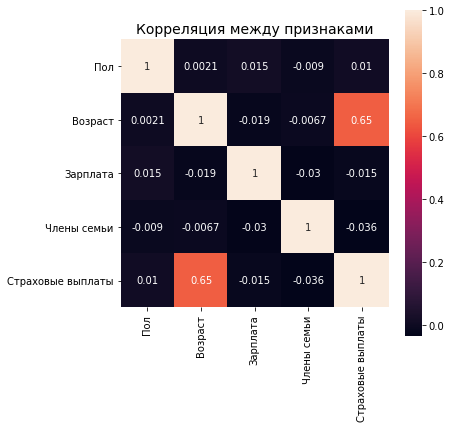

In [6]:
plt.figure(figsize = (6,6))
plt.title('Корреляция между признаками', size=14)
sns.heatmap(df.corr(), annot = True, square=True)

Среди признаков, по которым будет происходить обучение отсутствует значимая корреляция. Имеется средняя степень корреляции между возрастом и целевым признаком - страховые выплаты.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06aba46290>,
      dtype=object)

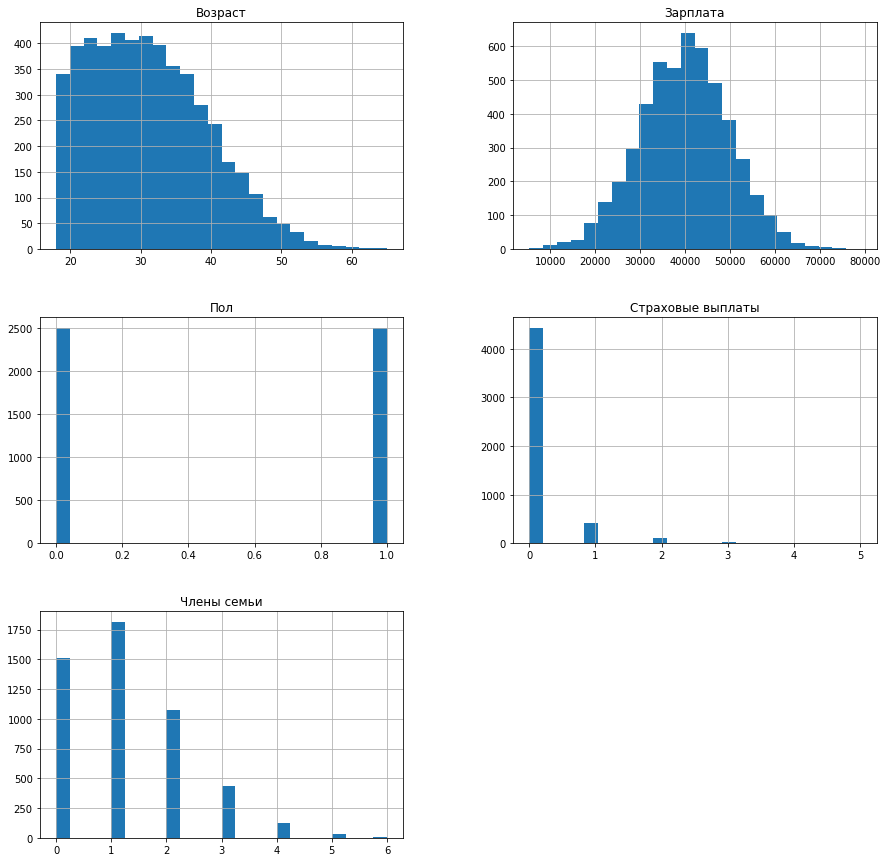

In [7]:
df.hist(bins = 24, figsize = (15,15))

Из распределений выплат можно сделать следующие выводы:
- целевой признак имеет дискретное распределение с максимумом в нуле;
- возраст имеет вид логнормального распределения;
- зарплата распределена нормально, что говорит о том, что данные скорее всего синтетические, так как обычно распределение зарплаты имеет длинный хвост в области высоких значений и при логарифмировании обычно имеет колоколообразный вид;
- признак пол также указывает на синтетическую природу данных, так как обычно женщин больше, чем мужчин среди взрослого населения.



## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**
- a. Изменится. Приведите примеры матриц.
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Произведем замену:

$$X' = XP$$

Тогда вектор весов $w'$ получим следующим образом:

$$w' = ((XP)^{T} XP)^{-1} (XP)^{T} y =  
     (P^{T}X^{T} XP)^{-1}P^{T}X^{T}y  = \\ 
     = P^{-1} (X^{T} X)^{-1} (P^{T})^{-1} P^{T}X^{T}y 
     = P^{-1} w, $$
     
использовав свойство единичной матрицы

$$(P^{T})^{-1} P^{T} = Е = 1$$ 


Таким образом, подставляя выражения для  $X'$ и $w'$ получаем:

$$ a' = X'w' = XPP^{-1}w = XEw = Xw= a $$

Что и требовалось доказать.

Таким образом, если матрицу признаков домножить на любую матрицу имеющую обратную матрицу, то результат работы модели не изменится.

**Вывод:** Предсказания модели не изменились, значит, и метрики качество не должны изменяться. 

**Ответ:** Не изменится. 

**Обоснование:** Домножение на обратимую матрицу происходит как матрицы признаков, так и векторов весов модели. Таким, образом, происходит последовательное умножение на матрицу и обратную матрицу, что не изменяем результат. 

## Алгоритм преобразования

**Алгоритм**
- создадим случайную матрицу требуемой размерности;
- проверим ее на обратимость;
- домножим на матрицу признаков;
- сравним результаты моделей до и после преобразования.

**Обоснование**
Такой алгоритм позволит защитить персональные данные клиентов, обеспечив такое же качество моделей машинного обучения.

## Проверка алгоритма

### Стандратизация признаков

In [8]:
scaler = StandardScaler()
scaler.fit(df[['Возраст', 'Зарплата']])
df[['Возраст', 'Зарплата']] = scaler.transform(df[['Возраст', 'Зарплата']])

### Разделение исходных данных на признаки и целевой признак

In [9]:
X = df.drop('Страховые выплаты', axis = 1)
y = df['Страховые выплаты']

### Создание матрицы для защиты персональных данных

In [10]:
random_matrix = np.random.random((X.shape[1], X.shape[1]))


In [11]:
np.linalg.inv(random_matrix)

array([[-1.67494198, -2.08107911,  2.99730631,  2.9654363 ],
       [ 0.61885641,  1.4515408 , -2.20785438,  0.59055415],
       [-1.35753908,  0.37820484,  1.21770768,  0.72893431],
       [ 2.39131628,  1.17834163, -1.63560748, -3.10620756]])

Обратная матрица найдена, поэтому матрица для защиты персональных данных обратимая. 
Матрица, имеющая обратную, должна быть квадратная. 

In [12]:
X_gamma = X @ random_matrix #создали новые признаки

### Обучение модели

In [13]:
X = X.values


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=RND)

In [15]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

In [18]:
predicted = model.predict(X_test)

In [19]:
r2 = r2_score(y_test, predicted); r2

0.4269864799858829

### Обучение модели с использованием преобразованных признаков

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
X_gamma, y, test_size=0.33, random_state=RND)

In [21]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

In [24]:
predicted = model.predict(X_test)

In [25]:
r2_gamma = r2_score(y_test, predicted); r2_gamma

0.426986479985883

In [26]:
(r2 - r2_gamma)*100 / r2_gamma

-2.600136249423782e-14

Разность между метрикой r2 для, полученных на основе признаков и преобразованных признаков несущественна. Поэтому можно сделать вывод, что преобразование признаков позволило скрыть персональные данные при этом это не повлияло на качество обучения.

### Обучение модели более подходящей для задачи

#### Обучение модели без наложения случайной матрицы

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=RND)
model_cat = CatBoostRegressor()
model_cat.fit(X_train, y_train)
predicted_cat = model_cat.predict(X_test)
r2_cat = r2_score(y_test, predicted_cat)

0:	learn: 0.4591087	total: 48.1ms	remaining: 48.1s
1:	learn: 0.4478435	total: 50.6ms	remaining: 25.2s
2:	learn: 0.4374214	total: 55.4ms	remaining: 18.4s
3:	learn: 0.4271300	total: 59.4ms	remaining: 14.8s
4:	learn: 0.4158822	total: 62.3ms	remaining: 12.4s
5:	learn: 0.4058960	total: 63.6ms	remaining: 10.5s
6:	learn: 0.3962567	total: 64.7ms	remaining: 9.18s
7:	learn: 0.3864453	total: 72ms	remaining: 8.93s
8:	learn: 0.3764362	total: 152ms	remaining: 16.7s
9:	learn: 0.3684293	total: 153ms	remaining: 15.1s
10:	learn: 0.3591512	total: 154ms	remaining: 13.9s
11:	learn: 0.3509650	total: 155ms	remaining: 12.8s
12:	learn: 0.3422272	total: 156ms	remaining: 11.9s
13:	learn: 0.3342653	total: 159ms	remaining: 11.2s
14:	learn: 0.3263273	total: 163ms	remaining: 10.7s
15:	learn: 0.3182874	total: 249ms	remaining: 15.3s
16:	learn: 0.3107025	total: 250ms	remaining: 14.5s
17:	learn: 0.3029814	total: 251ms	remaining: 13.7s
18:	learn: 0.2968277	total: 255ms	remaining: 13.2s
19:	learn: 0.2900246	total: 258ms	r

In [28]:
r2_cat

0.9968639875172862

#### Обучение модели с наложением случайной матрицы

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
X_gamma, y, test_size=0.33, random_state=RND)
model_cat = CatBoostRegressor()
model_cat.fit(X_train, y_train)
predicted_cat = model_cat.predict(X_test)
r2_gamma_cat = r2_score(y_test, predicted_cat); r2_gamma_cat

0:	learn: 0.4636414	total: 2.74ms	remaining: 2.74s
1:	learn: 0.4561004	total: 4.03ms	remaining: 2.01s
2:	learn: 0.4486938	total: 5.19ms	remaining: 1.72s
3:	learn: 0.4417917	total: 7.14ms	remaining: 1.78s
4:	learn: 0.4354545	total: 8.29ms	remaining: 1.65s
5:	learn: 0.4292743	total: 9.48ms	remaining: 1.57s
6:	learn: 0.4233624	total: 10.6ms	remaining: 1.51s
7:	learn: 0.4173301	total: 11.7ms	remaining: 1.45s
8:	learn: 0.4113871	total: 18.7ms	remaining: 2.06s
9:	learn: 0.4060644	total: 19.9ms	remaining: 1.97s
10:	learn: 0.4006121	total: 22.6ms	remaining: 2.03s
11:	learn: 0.3957765	total: 24.3ms	remaining: 2s
12:	learn: 0.3906765	total: 25.5ms	remaining: 1.94s
13:	learn: 0.3858330	total: 26.6ms	remaining: 1.87s
14:	learn: 0.3817575	total: 27.7ms	remaining: 1.82s
15:	learn: 0.3771363	total: 34.3ms	remaining: 2.11s
16:	learn: 0.3728604	total: 35.4ms	remaining: 2.05s
17:	learn: 0.3685437	total: 36.5ms	remaining: 1.99s
18:	learn: 0.3649730	total: 117ms	remaining: 6.04s
19:	learn: 0.3610014	total

0.8788642625208115

In [30]:
r2_gamma_cat

0.8788642625208115

Применение модели CatBoostRegressor позволило существенно повысить качество модели.
При этом качество модели существенно упало если применяется наложение случайной матрицы для сокрытия персональных данных. Поэтому примененный метод сокрытия персональных данных хорошо подходит для линейной регрессии, но не является универсальным. Скорее всего данный метод скрытия данных подходит только для линейной регрессии. Проблема в том, что линейная регрессия не подходит для данной задачи, так как полученное значение метрики качества невысокое.

# Общий вывод

- Среди признаков, по которым будет происходить обучение отсутствует значимая корреляция. Имеется средняя степень корреляции между возрастом и целевым признаком - страховые выплаты.
- Из распределений выплат можно сделать следующие выводы:
    - целевой признак имеет дискретное распределение с максимумом в нуле;
    - возраст имеет вид логнормального распределения;
    - зарплата распределена нормально, что говорит о том, что данные скорее всего синтетические, так как обычно распределение зарплаты имеет длинный хвост в области высоких значений и при логарифмировании обычно имеет колоколообразный вид;
    - признак пол также указывает на синтетическую природу данных, так как обычно женщин больше, чем мужчин среди взрослого населения.

- Eсли матрицу признаков домножить на любую матрицу имеющую обратную матрицу, то результат работы модели не изменится. 
- Алгоритм сокрытия персональных данных:
    - создадим случайную матрицу требуемой размерности;
    - проверим ее на обратимость;
    - домножим на матрицу признаков;
    - сравним результаты моделей до и после преобразования.Такой алгоритм позволит защитить персональные данные клиентов, обеспечив такое же качество моделей машинного обучения.
- Произвели обучение модели линейной регрессии. Разность между метрикой r2 для, полученных на основе признаков и преобразованных признаков несущественна. Поэтому можно сделать вывод, что преобразование признаков позволило скрыть персональные данные при этом это не повлияло на качество обучения. При этом нужно отметить, качество линейной модели невысокое. 
- Применение модели CatBoostRegressor позволило существенно повысить качество модели. При этом качество модели существенно упало если применяется наложение случайной матрицы для сокрытия персональных данных. 
- Примененный метод сокрытия персональных данных хорошо подходит для линейной регрессии, но не является универсальным. Скорее всего данный метод скрытия данных подходит только для линейной регрессии. Проблема в том, что линейная регрессия не подходит для данной задачи, так как полученное значение метрики качества невысокое.
